In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
# height vs weight
height = np.random.normal(170, 10, 1000)
weight = height * 0.5 + np.random.normal(0, 5, 1000)

data = pd.DataFrame({'height': height, 'weight': weight})
data.head(2)

,height,weight
0,178.954595,101.169763
1,176.639109,92.441967


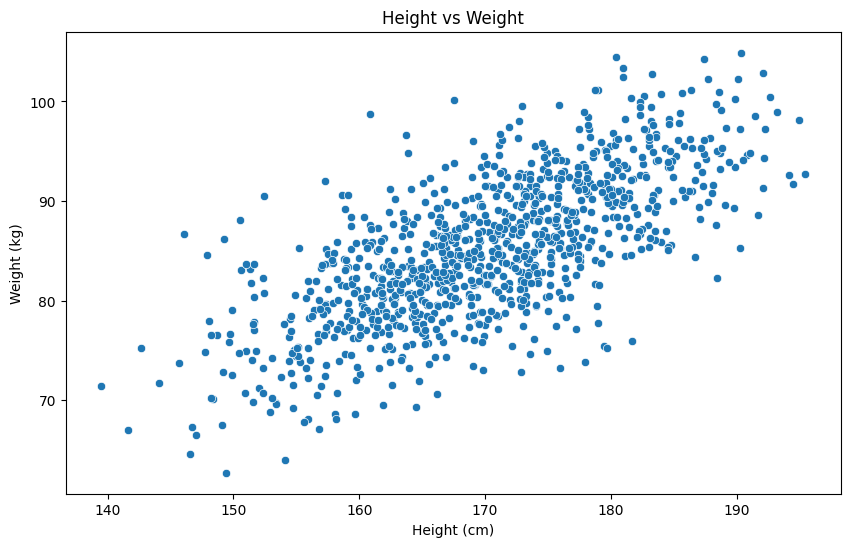

In [3]:
# plot it 
plt.figure(figsize=(10,6))
sns.scatterplot(data=data, x='height', y='weight')
plt.title('Height vs Weight')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show()

In [14]:
from sklearn.metrics import mean_squared_error
model = LinearRegression()
model.fit(data[['height']], data['weight'])

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [8]:
# lets train the Linear Regression model
from sklearn.metrics import mean_squared_error
model = LinearRegression()
model.fit(data[['height']], data['weight'])

# evaluate the model
mse = mean_squared_error(data['weight'], model.predict(data[['height']]))
print(f'Mean Squared Error: {mse:.2f}')

Mean Squared Error: 26.09


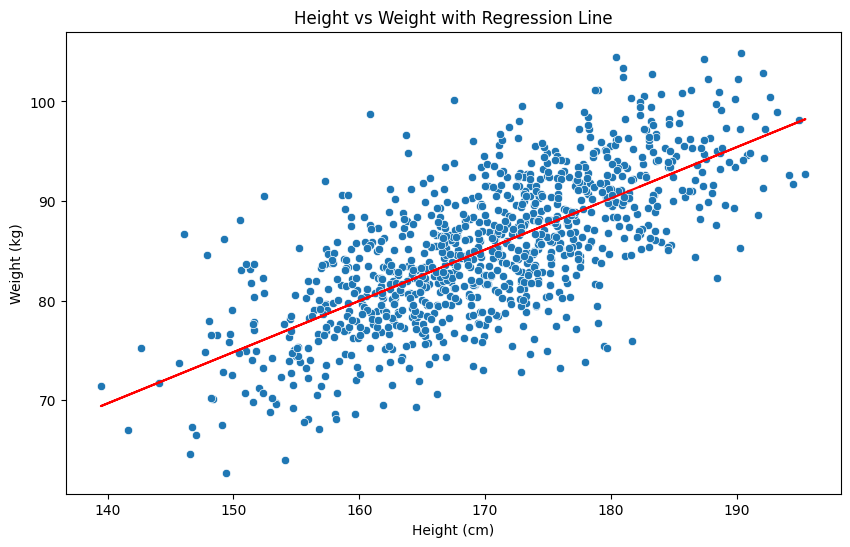

In [6]:
# check the coefficients
model.coef_, model.intercept_

# lets plot the regression line
plt.figure(figsize=(10,6))
sns.scatterplot(data=data, x='height', y='weight')
plt.plot(data['height'], model.predict(data[['height']]), color='red')
plt.title('Height vs Weight with Regression Line')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show()

In [12]:
height = 140
prediction = model.coef_ * height 
print(f'Predicted weight for height {height} cm is {prediction[0]:.2f} kg')



Predicted weight for height 140 cm is 72.09 kg


In [13]:
# hyperparameter tuning
parameters = {'fit_intercept': [True, False]}
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(LinearRegression(), parameters, cv=5)
grid_search.fit(data[['height']], data['weight'])

# get the best parameters
print(f'Best parameters: {grid_search.best_params_}')
# train the model with the best paramete

# mse
mean_squared_error(data['weight'], grid_search.predict(data[['height']]))

Best parameters: {'fit_intercept': False}


26.112034658107095